___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">DA & DVwPY</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Exploratory Data Analysis (EDA) Project</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">AutoScout Car Price Prediction EDA</p>



# PART- 3 `( Handling With Outliers )`

The third part is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

## Content


***What question are you trying to solve (or prove wrong)?***
***What kind of data do you have?***
***What’s missing from the data?***
***Where are the outliers?***
***How can we add, change or remove features to get more out of your data?***

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook



In [4]:
plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [5]:
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [6]:
df5= pd.read_csv("complete_scout2022.csv")

In [7]:
data1 = df5.copy

In [10]:
df5.shape

(28630, 30)

In [9]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   make_model                 28630 non-null  object 
 1   make                       28630 non-null  object 
 2   model                      28630 non-null  object 
 3   location                   28630 non-null  object 
 4   price                      28630 non-null  float64
 5   body_type                  28630 non-null  object 
 6   type                       28630 non-null  object 
 7   doors                      28630 non-null  float64
 8   warranty                   28630 non-null  object 
 9   mileage                    28630 non-null  float64
 10  gearbox                    28630 non-null  object 
 11  fuel_type                  28630 non-null  object 
 12  seller                     28630 non-null  object 
 13  seats                      28630 non-null  flo

In [12]:
df5.describe(exclude= "object").T

,count,mean,std,min,25%,50%,75%,max
price,28630.000,23470.662,23953.504,490.000,11990.000,17979.000,27990.000,999999.000
doors,28630.000,4.140,1.213,1.000,3.000,5.000,5.000,6.000
mileage,28630.000,72624.556,67628.564,0.000,20290.000,57491.500,106667.500,1440000.000
seats,28630.000,4.703,0.808,0.000,4.000,5.000,5.000,17.000
engine_size,28630.000,1745.833,1045.441,0.000,1300.000,1598.000,1984.000,99900.000
gears,28630.000,5.924,1.203,0.000,6.000,6.000,6.000,10.000
co_emissions,28630.000,133.224,121.685,0.000,107.000,124.000,155.000,15168.000
empty_weight,28630.000,1419.383,324.979,75.000,1214.000,1371.000,1595.000,15590.000
previous_owner,28630.000,1.509,0.920,0.000,1.000,1.000,2.000,9.000
age,28630.000,6.837,8.758,-180.000,2.000,4.000,8.000,122.000


In [19]:
# Calculating of limits
def limits(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    print("Lower Limit:",lower_lim) 
    print("Upper limit:", upper_lim)



In [21]:
#Counting of Outliers
def outliers(df5, column):
    Q1 = df5[column].quantile(1/4)
    Q3 = df5[column].quantile(3/4)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    
    return ((df5[column] < lower_lim) | (df5[column] > upper_lim)).sum()

In [22]:
# Dropping of Outliers
def dropping_of_outliers(df, column):
    Q1 = df5[column].quantile(0.25)
    Q3 = df5[column].quantile(0.75)
    IQR = Q3-Q1
    lower_lim= Q1-1.5*IQR
    upper_lim= Q3+1.5*IQR
    
    return df5[column].loc[~((df5[column]<lower_lim) | (df5[column]>upper_lim))]

In [23]:
#Explore different quantiles at the upper end
def winsorize_percentage_selection(df,column):
    print('90% quantile:   ', df5[column].quantile(0.90))      
    print('92.5% quantile: ', df5[column].quantile(0.925))      
    print('95% quantile:   ', df5[column].quantile(0.95))       
    print('97.5% quantile: ', df5[column].quantile(0.975))      
    print('99% quantile:   ', df5[column].quantile(0.99))       
    print('99.9% quantile: ', df5[column].quantile(0.999))

## price

In [24]:
df5.price.count()

28630

In [25]:
df5.price.describe()

count    28630.000
mean     23470.662
std      23953.504
min        490.000
25%      11990.000
50%      17979.000
75%      27990.000
max     999999.000
Name: price, dtype: float64

In [38]:
df5.price.sort_values(ascending= True).head(10)

5847    490.000
19565   500.000
5513    500.000
17516   590.000
5291    600.000
5351    600.000
5296    699.000
23792   700.000
3375    700.000
5519    740.000
Name: price, dtype: float64

In [27]:
limits(df5,'price')

Lower Limit: -12010.0
Upper limit: 51990.0


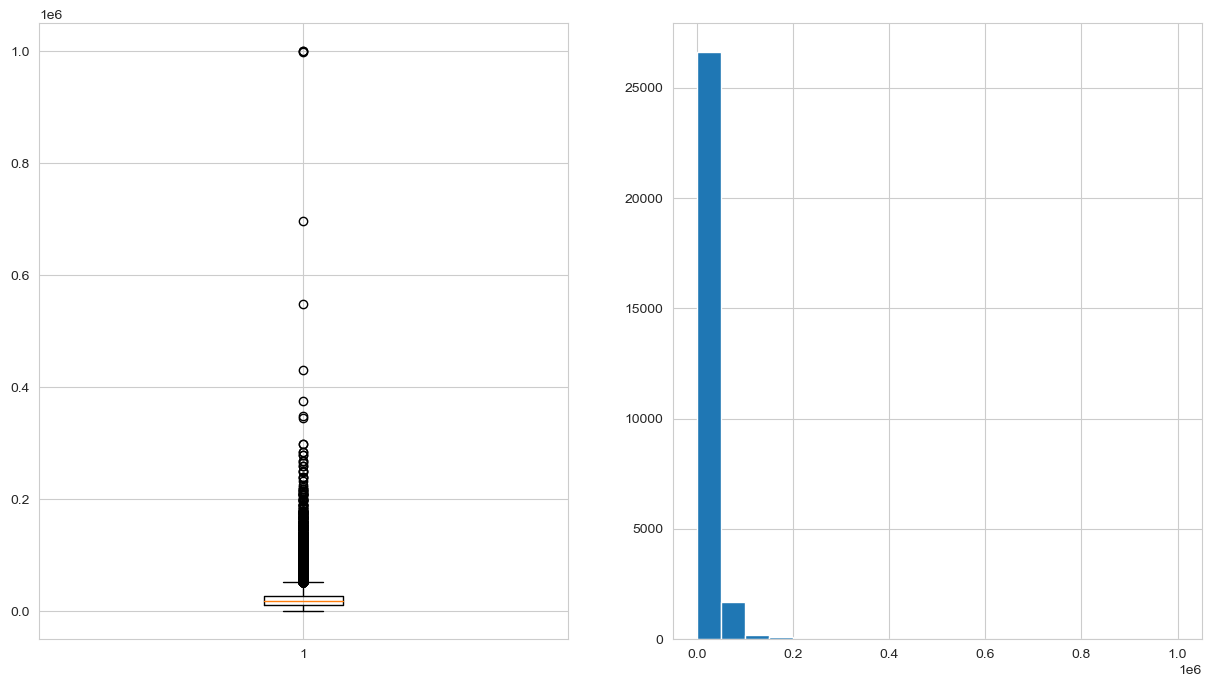

In [32]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.boxplot(df5.price)
plt.subplot(122)
plt.hist(df5.price,bins=20);



In [34]:
outliers(df5,'price')

1908

In [36]:
winsorize_percentage_selection(df5,'price')

90% quantile:    42977.3
92.5% quantile:  49574.250000000065
95% quantile:    57500.0
97.5% quantile:  72940.0
99% quantile:    109897.09999999999
99.9% quantile:  219927.50000000704


In [ ]:
%97.5 Quantilehas been selected

In [43]:
#df5.price = winsorize(df5['price'],(0, 0.025)), inplace =True
df5['price'] = winsorize(df5['price'], (0, 0.025))
df5['price'].fillna(method='ffill', inplace=True)

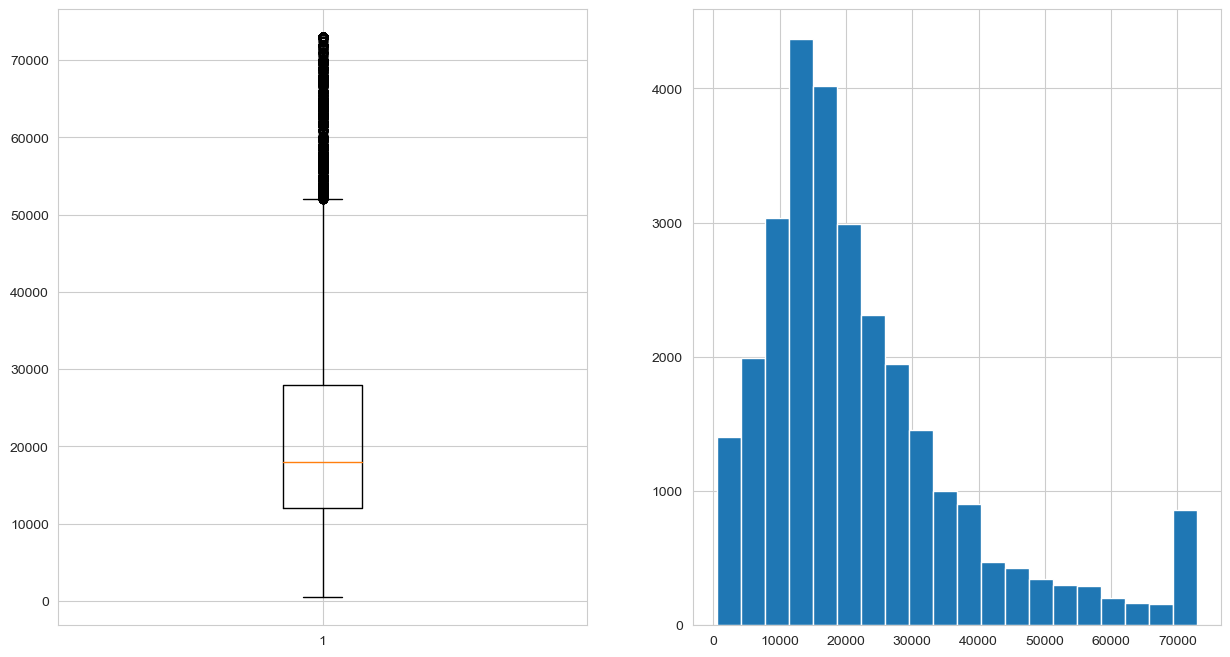

In [44]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.boxplot(df5.price)
plt.subplot(122)
plt.hist(df5.price,bins=20);


In [45]:
df5.price.describe()

count   28630.000
mean    22292.614
std     15673.925
min       490.000
25%     11990.000
50%     17979.000
75%     27990.000
max     72940.000
Name: price, dtype: float64

## power_in_kw

In [46]:
df5.power_in_kw.describe()

count   28612.000
mean      119.652
std        68.477
min         1.000
25%        80.000
50%       100.000
75%       136.000
max       924.000
Name: power_in_kw, dtype: float64

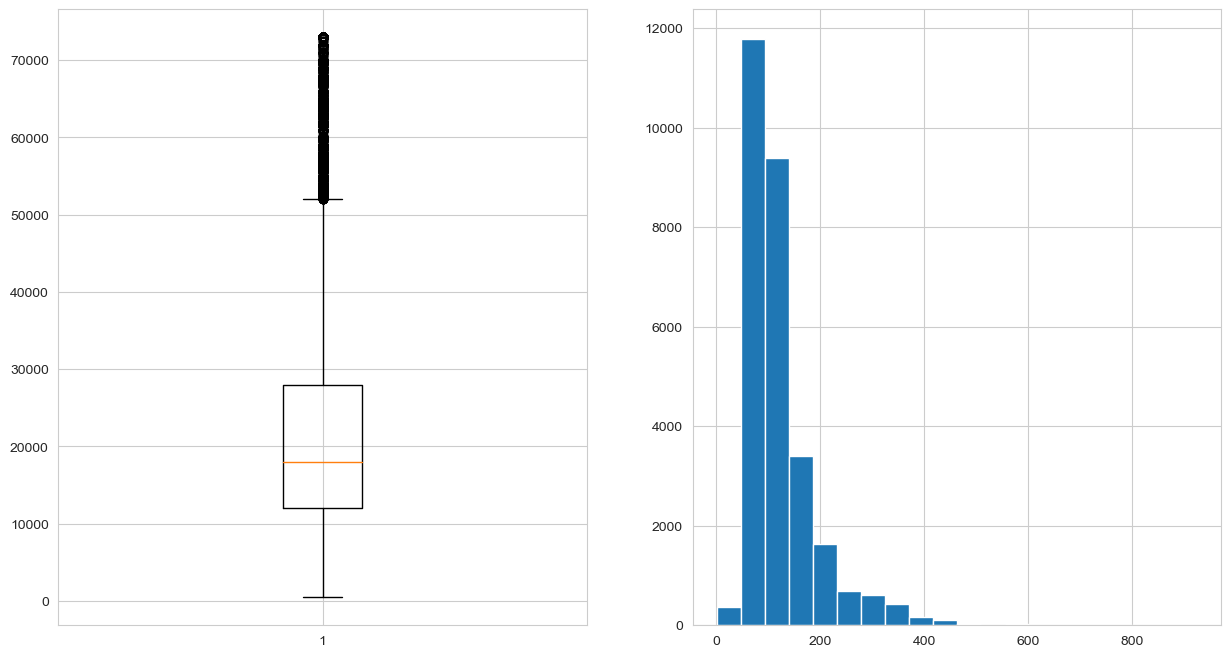

In [47]:
plt.figure(figsize=(15,8))
plt.subplot(121)
plt.boxplot(df5.price)
plt.subplot(122)
plt.hist(df5.power_in_kw,bins=20);


In [48]:
limits(df5,'power_in_kw')

Lower Limit: -4.0
Upper limit: 220.0


In [49]:
outliers(df5,'power_in_kw')

2644

In [50]:
winsorize_percentage_selection(df5,'power_in_kw')

90% quantile:    206.0
92.5% quantile:  228.0
95% quantile:    270.0
97.5% quantile:  330.0
99% quantile:    375.0
99.9% quantile:  532.72300000002


# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [ ]:
#df.to_csv('output.csv', index=False)
#df1= df.to_csv("final_scout_not_dummy.csv", index=False)
#df1

# Dummy Operation

## Export dataframe to csv file (dummy)

In [ ]:
#df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [ ]:
plt.figure(figsize =(16,10))
sns.scatterplot(x=df.empty_weight.value_counts(dropna=False).index, y=df.empty_weight.value_counts(dropna=False));